In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

%matplotlib inline

# EDA

In [2]:
df = pd.read_csv('healthcare_dataset.csv')

In [35]:
df['Admission Type'].unique()

array(['Elective', 'Emergency', 'Urgent'], dtype=object)

In [3]:
df.shape

(10000, 15)

In [4]:
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Tiffany Ramirez,81,Female,O-,Diabetes,2022-11-17,Patrick Parker,Wallace-Hamilton,Medicare,37490.983364,146,Elective,2022-12-01,Aspirin,Inconclusive
1,Ruben Burns,35,Male,O+,Asthma,2023-06-01,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,47304.064845,404,Emergency,2023-06-15,Lipitor,Normal
2,Chad Byrd,61,Male,B-,Obesity,2019-01-09,Paul Baker,Walton LLC,Medicare,36874.896997,292,Emergency,2019-02-08,Lipitor,Normal
3,Antonio Frederick,49,Male,B-,Asthma,2020-05-02,Brian Chandler,Garcia Ltd,Medicare,23303.322092,480,Urgent,2020-05-03,Penicillin,Abnormal
4,Mrs. Brandy Flowers,51,Male,O-,Arthritis,2021-07-09,Dustin Griffin,"Jones, Brown and Murray",UnitedHealthcare,18086.344184,477,Urgent,2021-08-02,Paracetamol,Normal


In [5]:
df.isnull().sum()

Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                10000 non-null  object 
 1   Age                 10000 non-null  int64  
 2   Gender              10000 non-null  object 
 3   Blood Type          10000 non-null  object 
 4   Medical Condition   10000 non-null  object 
 5   Date of Admission   10000 non-null  object 
 6   Doctor              10000 non-null  object 
 7   Hospital            10000 non-null  object 
 8   Insurance Provider  10000 non-null  object 
 9   Billing Amount      10000 non-null  float64
 10  Room Number         10000 non-null  int64  
 11  Admission Type      10000 non-null  object 
 12  Discharge Date      10000 non-null  object 
 13  Medication          10000 non-null  object 
 14  Test Results        10000 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 1.1+

In [7]:
df.duplicated().sum()

0

In [8]:
df.describe()

,Age,Billing Amount,Room Number
count,10000.000000,10000.000000,10000.000000
mean,51.452200,25516.806778,300.082000
std,19.588974,14067.292709,115.806027
min,18.000000,1000.180837,101.000000
25%,35.000000,13506.523967,199.000000
50%,52.000000,25258.112566,299.000000
75%,68.000000,37733.913727,400.000000
max,85.000000,49995.902283,500.000000


# Univariate Analysis

<Axes: xlabel='Gender', ylabel='count'>

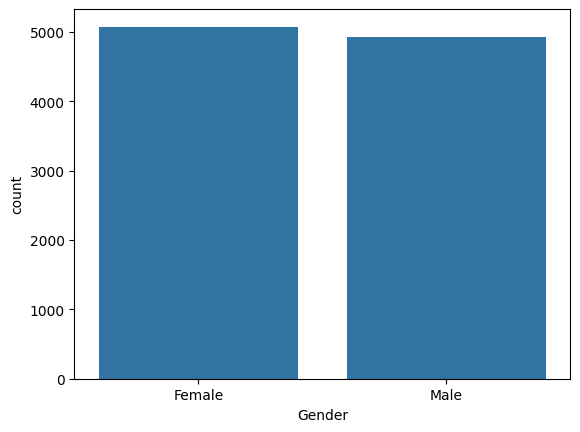

In [9]:
sns.countplot(x=df['Gender'])

<Axes: ylabel='count'>

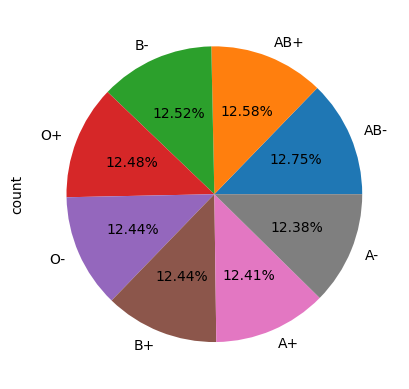

In [10]:
df['Blood Type'].value_counts().plot(kind='pie', autopct='%.2f%%')

<Axes: ylabel='count'>

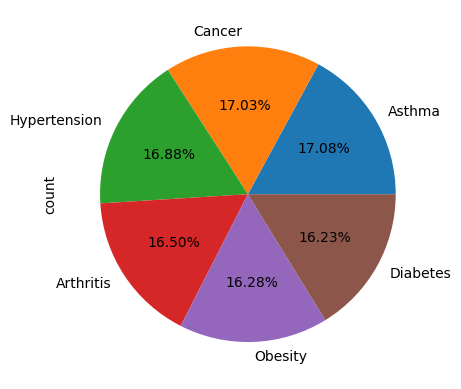

In [11]:
df['Medical Condition'].value_counts().plot(kind='pie', autopct='%.2f%%')

<Axes: ylabel='count'>

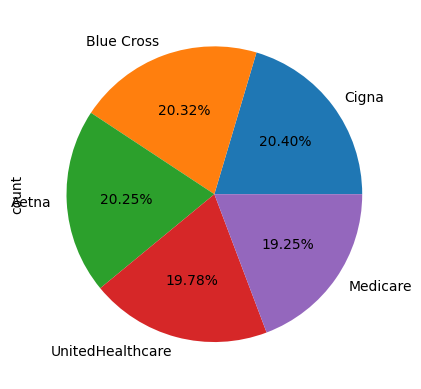

In [12]:
df['Insurance Provider'].value_counts().plot(kind='pie', autopct='%.2f%%')

In [13]:
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Tiffany Ramirez,81,Female,O-,Diabetes,2022-11-17,Patrick Parker,Wallace-Hamilton,Medicare,37490.983364,146,Elective,2022-12-01,Aspirin,Inconclusive
1,Ruben Burns,35,Male,O+,Asthma,2023-06-01,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,47304.064845,404,Emergency,2023-06-15,Lipitor,Normal
2,Chad Byrd,61,Male,B-,Obesity,2019-01-09,Paul Baker,Walton LLC,Medicare,36874.896997,292,Emergency,2019-02-08,Lipitor,Normal
3,Antonio Frederick,49,Male,B-,Asthma,2020-05-02,Brian Chandler,Garcia Ltd,Medicare,23303.322092,480,Urgent,2020-05-03,Penicillin,Abnormal
4,Mrs. Brandy Flowers,51,Male,O-,Arthritis,2021-07-09,Dustin Griffin,"Jones, Brown and Murray",UnitedHealthcare,18086.344184,477,Urgent,2021-08-02,Paracetamol,Normal


In [14]:
df= df[['Age', 'Gender', 'Blood Type', 'Medical Condition', 'Insurance Provider', 'Billing Amount', 'Admission Type','Test Results']]

In [15]:
df.head()

,Age,Gender,Blood Type,Medical Condition,Insurance Provider,Billing Amount,Admission Type,Test Results
0,81,Female,O-,Diabetes,Medicare,37490.983364,Elective,Inconclusive
1,35,Male,O+,Asthma,UnitedHealthcare,47304.064845,Emergency,Normal
2,61,Male,B-,Obesity,Medicare,36874.896997,Emergency,Normal
3,49,Male,B-,Asthma,Medicare,23303.322092,Urgent,Abnormal
4,51,Male,O-,Arthritis,UnitedHealthcare,18086.344184,Urgent,Normal


In [16]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

In [22]:
X = df.iloc[:,0:7]
y = df.iloc[:,-1]

In [23]:
y

0       Inconclusive
1             Normal
2             Normal
3           Abnormal
4             Normal
            ...     
9995        Abnormal
9996          Normal
9997          Normal
9998          Normal
9999        Abnormal
Name: Test Results, Length: 10000, dtype: object

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [28]:
X_train

,Age,Gender,Blood Type,Medical Condition,Insurance Provider,Billing Amount,Admission Type
6214,31,Female,A+,Cancer,Cigna,14634.659592,Emergency
1634,85,Female,AB+,Hypertension,Medicare,19428.598024,Emergency
6062,52,Female,A+,Obesity,Cigna,41639.384936,Emergency
600,30,Female,B+,Asthma,Aetna,43169.871555,Urgent
1397,26,Male,B+,Asthma,Blue Cross,2441.891018,Emergency
...,...,...,...,...,...,...,...
4425,33,Female,B+,Hypertension,Cigna,48575.770564,Elective
7590,72,Male,B-,Hypertension,Aetna,48595.989034,Emergency
7782,40,Male,O-,Asthma,Cigna,32569.824969,Urgent
6529,57,Female,AB+,Cancer,Aetna,31391.374464,Emergency


In [36]:
transformer = ColumnTransformer([
    ('tnf1', OneHotEncoder(drop='first', sparse=False), ['Gender', 'Blood Type', 'Medical Condition', 'Insurance Provider']),
    ('tnf2', OrdinalEncoder(categories=[['Elective', 'Emergency', 'Urgent']]), ['Admission Type'])
], remainder='passthrough')

In [38]:
transformer.fit_transform(X_train).shape

c:\Python\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


(8000, 20)

In [ ]:
transformer.fit_transform(X_train).shapetransformer.transform(X_test).shape